Data Acquisition and connections

In [0]:
%scala
import org.apache.spark.sql.SparkSession

val spark = SparkSession.builder()
  .appName("SAP HANA Connection")
  .config("spark.jars", "dbfs:/FileStore/jars/9b273499_9648_4afe_834d_e36803698a91-ngdbc_2_19_16-2221a.jar")
  .getOrCreate()

val jdbcUrl = "jdbc:sap://d8f86797-d0b3-4263-9058-805193d7b941.hna0.prod-eu10.hanacloud.ondemand.com:443"
val connectionProperties = new java.util.Properties()
connectionProperties.put("user", "DWCDBUSER#DATABRICKS")
connectionProperties.put("password", "(`<Kal%U7mp5]u7<")
connectionProperties.put("driver", "com.sap.db.jdbc.Driver")

import org.apache.spark.sql.SparkSession
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@7f7c940a
jdbcUrl: String = jdbc:sap://d8f86797-d0b3-4263-9058-805193d7b941.hna0.prod-eu10.hanacloud.ondemand.com:443
connectionProperties: java.util.Properties = {user=DWCDBUSER#DATABRICKS, password=(`<Kal%U7mp5]u7<, driver=com.sap.db.jdbc.Driver}
res1: Object = null

In [0]:
%scala
val query1 = "(SELECT * FROM SB_TEST.VW_BIG_MART_TRAIN_DATA) AS SUBQUERY"
val df1 = spark.read.jdbc(jdbcUrl, query1, connectionProperties)
df1.createOrReplaceTempView("BIG_MART_TRAIN_DATA")


query1: String = (SELECT * FROM SB_TEST.VW_BIG_MART_TRAIN_DATA) AS SUBQUERY
df1: org.apache.spark.sql.DataFrame = [Item_Identifier: string, Item_Weight: decimal(38,19) ... 10 more fields]

In [0]:
%scala
val query2 = "(SELECT * FROM SB_TEST.VW_BIG_MART_TEST_DATA) AS SUBQUERY"
val df2 = spark.read.jdbc(jdbcUrl, query2, connectionProperties)
df2.createOrReplaceTempView("BIG_MART_TEST_DATA")

query2: String = (SELECT * FROM SB_TEST.VW_BIG_MART_TEST_DATA) AS SUBQUERY
df2: org.apache.spark.sql.DataFrame = [Item_Identifier: string, Item_Weight: decimal(38,19) ... 9 more fields]

Analyse the SAP Data

In [0]:
%sql
SELECT * FROM BIG_MART_TRAIN_DATA LIMIT 100;

SELECT * FROM BIG_MART_TEST_DATA LIMIT 100;

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
FDW58,20.7500000000000000000,Low Fat,0.0075648360000000000,Snack Foods,107.8622000000000000000,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDW14,8.3000000000000000000,reg,0.0384276770000000000,Dairy,87.3198000000000000000,OUT017,2007,,Tier 2,Supermarket Type1
NCN55,14.6000000000000000000,Low Fat,0.0995749080000000000,Others,241.7538000000000000000,OUT010,1998,,Tier 3,Grocery Store
FDQ58,7.3150000000000000000,Low Fat,0.0153883930000000000,Snack Foods,155.0340000000000000000,OUT017,2007,,Tier 2,Supermarket Type1
FDY38,null,Regular,0.1185993140000000000,Dairy,234.2300000000000000000,OUT027,1985,Medium,Tier 3,Supermarket Type3
FDH56,9.8000000000000000000,Regular,0.0638172060000000000,Fruits and Vegetables,117.1492000000000000000,OUT046,1997,Small,Tier 1,Supermarket Type1
FDL48,19.3500000000000000000,Regular,0.0826015370000000000,Baking Goods,50.1034000000000000000,OUT018,2009,Medium,Tier 3,Supermarket Type2
FDC48,null,Low Fat,0.0157824950000000000,Baking Goods,81.0592000000000000000,OUT027,1985,Medium,Tier 3,Supermarket Type3
FDN33,6.3050000000000000000,Regular,0.1233654460000000000,Snack Foods,95.7436000000000000000,OUT045,2002,,Tier 2,Supermarket Type1
FDA36,5.9850000000000000000,Low Fat,0.0056984350000000000,Baking Goods,186.8924000000000000000,OUT017,2007,,Tier 2,Supermarket Type1


In [0]:
spark_temp_table_df1 = spark.sql("SELECT * FROM BIG_MART_TRAIN_DATA")
train_df = spark_temp_table_df1.toPandas()

spark_temp_table_df2 = spark.sql("SELECT * FROM BIG_MART_TEST_DATA")
test_df = spark_temp_table_df2.toPandas()

/databricks/spark/python/pyspark/sql/pandas/utils.py:105: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(
/databricks/spark/python/pyspark/sql/pandas/utils.py:105: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [Item_Weight, Item_Visibility, Item_MRP] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


Data Wrangling

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

def preprocess_data(train_df, test_df):
    """
    Preprocesses the given train and test dataframes by performing the following steps:
    
    1. Adds a 'from' column to indicate the source of each row ('train' or 'test').
    2. Concatenates the train and test dataframes into a single dataframe.
    3. Fills missing values in 'Item_Weight' with the mean of the column.
    4. Fills missing values in 'Outlet_Size' with the value 'Medium'.
    5. Standardizes the values in the 'Item_Fat_Content' column.
    6. One-hot encodes the 'Item_Fat_Content' column and drops the original column.
    7. Replaces zero values in 'Item_Visibility' with the mean of the column.
    
    Parameters:
    - train_df (pd.DataFrame): The training dataframe.
    - test_df (pd.DataFrame): The testing dataframe.
    
    Returns:
    pd.DataFrame: The preprocessed dataframe containing both train and test data.
    """
    # Add 'from' column to indicate source
    train_df['from'] = 'train'
    test_df['from'] = 'test'
    
    # Concatenate train and test data
    df = pd.concat([train_df, test_df], ignore_index=True)
    
    # Fill missing values
    df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
    df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')
    
    # Standardize item fat content values
    df['Item_Fat_Content'].replace(["Low Fat", "LF", "low fat", "Regular", "reg"],
                                   ["Low_Fat", "Low_Fat", "Low_Fat", "Regular", "Regular"], inplace=True)
    
    # One-hot encode 'Item_Fat_Content'
    dummy_var = pd.get_dummies(df['Item_Fat_Content'])
    df = pd.concat([df, dummy_var], axis=1)
    df.drop('Item_Fat_Content', axis=1, inplace=True)
    
    # Replace zero values in 'Item_Visibility' with the mean
    df.loc[df['Item_Visibility'] == 0, 'Item_Visibility'] = df['Item_Visibility'].mean()
    
    return df

In [0]:
df = preprocess_data(train_df, test_df)
print(df.shape)
df.head(10)

(14204, 14)


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,from,Low_Fat,Regular
0,FDA15,9.3000000000000000000,0.0160473010000000000,Dairy,249.8092000000000000000,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380000000000000000,train,1,0
1,DRC01,5.9200000000000000000,0.0192782160000000000,Soft Drinks,48.2692000000000000000,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228000000000000000,train,0,1
2,FDN15,17.5000000000000000000,0.0167600750000000000,Meat,141.6180000000000000000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700000000000000000,train,1,0
3,FDX07,19.2000000000000000000,0.065953,Fruits and Vegetables,182.0950000000000000000,OUT010,1998,,Tier 3,Grocery Store,732.3800000000000000000,train,0,1
4,NCD19,8.9300000000000000000,0.065953,Household,53.8614000000000000000,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052000000000000000,train,1,0
5,FDP36,10.3950000000000000000,0.065953,Baking Goods,51.4008000000000000000,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088000000000000000,train,0,1
6,FDO10,13.6500000000000000000,0.0127410890000000000,Snack Foods,57.6588000000000000000,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528000000000000000,train,0,1
7,FDP10,12.792854,0.1274698570000000000,Snack Foods,107.7622000000000000000,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636000000000000000,train,1,0
8,FDH17,16.2000000000000000000,0.0166871140000000000,Frozen Foods,96.9726000000000000000,OUT045,2002,,Tier 2,Supermarket Type1,1076.5986000000000000000,train,0,1
9,FDU28,19.2000000000000000000,0.0944495900000000000,Frozen Foods,187.8214000000000000000,OUT017,2007,,Tier 2,Supermarket Type1,4710.5350000000000000000,train,0,1


Exploratory Data Analysis

In [0]:
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
from                             2
Low_Fat                          2
Regular                          2
dtype: int64

In [0]:
df.pivot_table(index= "Outlet_Type", values="Item_Outlet_Sales")

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [0]:
df.pivot_table(index="Outlet_Location_Type", values="Item_Outlet_Sales")

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


<AxesSubplot:>

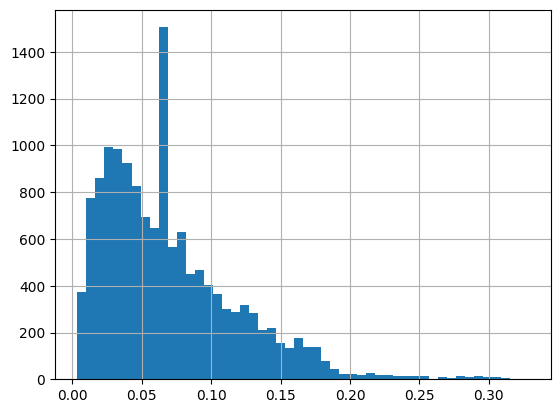

In [0]:
df.Item_Visibility.hist(bins=50)

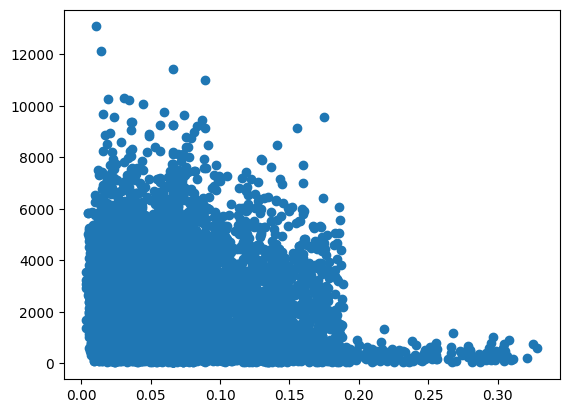

In [0]:
plt.scatter(df.Item_Visibility, df.Item_Outlet_Sales)

In [0]:
df['Item_Type_Combined']=df.Item_Identifier.apply(lambda x:x[0:2])
df['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [0]:
df["Item_Type_Combined"]=df["Item_Type_Combined"].map({"FD":"Food_Drink", "NC":"Non_Consumable", "DR":"Drinks"})
df["Item_Type_Combined"].value_counts()

Food_Drink        10201
Non_Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [0]:
df["Outlet_Years"]=2013-df["Outlet_Establishment_Year"]

In [0]:
df["Outlet_Years"].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

Feature Extraction

In [0]:
def prepare_data(df):
    """
    Prepares the given dataframe by performing the following steps:
    
    1. Drops specified columns: 'Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'.
    2. Splits the dataframe into training (train1) and testing (test1) sets based on the 'from' column.
    3. Drops the 'from' column from the training set and specified columns ('from', 'Item_Outlet_Sales') from the testing set.
    4. Separates features (x_data) and target variable (y_data) from the training set.
    
    Parameters:
    - df (pd.DataFrame): The input dataframe.
    
    Returns:
    pd.DataFrame: The training set without the 'from' column.
    pd.DataFrame: The testing set without the 'from' and 'Item_Outlet_Sales' columns.
    pd.DataFrame: The features from the training set.
    pd.Series: The target variable from the training set.
    """
    # Drop specified columns
    df.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier", "Outlet_Establishment_Year"], axis=1, inplace=True)
    
    # Split into training and testing sets
    train1 = df[df["from"] == "train"]
    test1 = df[df["from"] == "test"]
    
    # Drop columns from training and testing sets
    train1.drop("from", axis=1, inplace=True)
    test1.drop(["from", "Item_Outlet_Sales"], axis=1, inplace=True)
    
    # Separate features and target variable from the training set
    x_data = train1.drop("Item_Outlet_Sales", axis=1)
    y_data = train1["Item_Outlet_Sales"]
    
    return train1, test1, x_data, y_data

In [0]:
train_data, test_data, x_data, y_data = prepare_data(df)
print(train_data.shape, test_data.shape, x_data.shape, y_data.shape)

(8523, 12) (5681, 11) (8523, 11) (8523,)


/root/.ipykernel/957/command-652443100447062-1224607406:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.drop("from", axis=1, inplace=True)
/root/.ipykernel/957/command-652443100447062-1224607406:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.drop(["from", "Item_Outlet_Sales"], axis=1, inplace=True)


Data standardization

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def scale_and_split_data(features, target, test_size=0.2, random_state=42):
    """
    Scales the input features using StandardScaler and performs train-test split.

    Parameters:
    - features (pd.DataFrame): The features dataframe.
    - target (pd.Series): The target variable.
    - test_size (float, optional): The proportion of the dataset to include in the test split.
      Defaults to 0.2.
    - random_state (int, optional): Controls the randomness of the training and testing indices.
      Defaults to 42.

    Returns:
    pd.DataFrame: Scaled features dataframe.
    pd.DataFrame: Scaled training features.
    pd.DataFrame: Scaled testing features.
    pd.Series: Training target variable.
    pd.Series: Testing target variable.
    """
    # Scale the features using StandardScaler
    scaler = StandardScaler().fit(features)
    scaled_features = pd.DataFrame(scaler.transform(features), columns=features.columns)
    
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=test_size, random_state=random_state)

    return scaled_features, X_train, X_test, y_train, y_test

# features and target already defined
scaled_features, X_train, X_test, y_train, y_test = scale_and_split_data(x_data, y_data)
print(scaled_features.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8523, 11) (6818, 11) (1705, 11) (6818,) (1705,)


Model and Accuracy Metrics

In [0]:
def train_evaluate_random_forest(X_train, y_train, X_test, y_test, n_estimators=100, random_state=None):
    """
    Trains a RandomForestRegressor, predicts on the test set, and calculates RMSE.

    Parameters:
    - X_train (pd.DataFrame): Training features.
    - y_train (pd.Series): Training target variable.
    - X_test (pd.DataFrame): Testing features.
    - y_test (pd.Series): Testing target variable.
    - n_estimators (int, optional): The number of trees in the forest. Defaults to 100.
    - random_state (int, optional): Controls the randomness of the estimator. Defaults to None.

    Returns:
    RandomForestRegressor: Trained RandomForestRegressor model.
    np.ndarray: Predicted values on the test set.
    float: Root Mean Squared Error (RMSE) on the test set.
    """
    # Initialize and train the RandomForestRegressor
    RFmodel = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, random_state=random_state)
    RFmodel.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = RFmodel.predict(X_test)
    
    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return RFmodel, y_pred, rmse

# X_train, y_train, X_test, and y_test already defined
trained_model, y_pred, rmse = train_evaluate_random_forest(X_train, y_train, X_test, y_test)
print("RMSE :", rmse)

RMSE : 1084.0685710403811
